# This code generates the weight matrices used for the fruit fly olfactory pathway

In [48]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
import seaborn as sns
import rdata
import json

In [49]:
conn = pd.read_csv(f'connections.csv')
names = pd.read_csv(f'names.csv')
cell_types = pd.read_csv(f'consolidated_cell_types.csv')
community_labels = pd.read_csv(f'processed_labels.csv')
cell_types

,root_id,primary_type,additional_type(s)
0,720575940596125868,T5c,NaN
1,720575940597856265,Tm16,NaN
2,720575940597944841,Tm7,CB3851
3,720575940598267657,TmY15,NaN
4,720575940599333574,Tm1,NaN
...,...,...,...
137672,720575940661335681,CB0180,NaN
137673,720575940661336193,TmY3,NaN
137674,720575940661337217,KCab-p,NaN
137675,720575940661338497,CB0904,NaN


In [50]:
# Schlegel et al. (2021)
# pick neuron classes listed in Fig. 1 -> exclude those without search results in codex
# anterior paired lateral neurons
receptors={'ALRN':'ALRN', 'ORN':'ORN', 'T/HRN':'HRN'} #'T/HRN'
antennal_lobe_local={'ALLN':'ALLN'}
antannal_lobe_projection={'ALPN':'ALPN'} #'uPN', 'mPN'
lat_horn_calyx_noMB = {'LHLN':'LHLN'} #'TOON', 'LHN', 'LHON', 'CN1'
lat_horn_calyx_MB = {'LHCENT':'LHCENT'}
MB = {'KC':'class_Kenyon_cell','MBON':'class_MBON','DAN':'class_DAN','WEDPN':'WEDPN', 'APL':'APL'}# 'CXN','DN', 'CN2'

#codex other keywords
other = {'olfactory': 'class_olfactory'}

neurons=[receptors, antennal_lobe_local, antannal_lobe_projection,lat_horn_calyx_noMB, lat_horn_calyx_MB, MB, other]


used_IDs=[]
used_cell_types=[]
used_neurons={}
N=0

def load_txt_to_list(filepath):
    """Loads a text file, splitting each line by commas, and returns a list of lists."""
    result = []
    with open(filepath, 'r') as file:
        for line in file:
            # Remove leading/trailing whitespace and split by commas
            items = [item.strip() for item in line.strip().split(',')]
            result.append(items)
    return result

broad_cell_types={}
broad_cell_types_r={}

for group in neurons:

    for cell_type_broad, codex_call in group.items():

        with open(f"codex_keywords/root_ids_{codex_call}.txt","r") as f:
            broad_cell_types[cell_type_broad]=[]
            
            IDs = f.read().split(",") 
            print(f"codex_keywords/root_ids_{codex_call}.txt: {len(IDs)} neurons")
            for ID in IDs:
                if ID not in used_IDs:
                    used_IDs.append(ID)
                    broad_cell_types[cell_type_broad].append(ID)
                    broad_cell_types_r[ID]=cell_type_broad



        
        for ID in IDs:
            type1 = np.array(cell_types.loc[cell_types['root_id'] == int(ID), 'primary_type'])
            type2 = np.array(cell_types.loc[cell_types['root_id'] == int(ID), 'additional_type(s)'])
            if len(type1)>0:
                if type1[0] not in used_cell_types:
                    used_cell_types.append(type1[0])

            #ignoring other (secondary) cell types for now
            '''
            if len(type2)>0:
                print(type(type2))
                if type(type2) =='str':
                    print(f'type2: {type2}')
                    print(f'type2: {type(type2[0])}')
                
                used_cell_types.append(type2)'''

print(used_cell_types)
N_neurons=len(used_IDs)
print(f'neurons overall: {N_neurons}, cell types (codex): {len(used_cell_types)}')

codex_keywords/root_ids_ALRN.txt: 2328 neurons
codex_keywords/root_ids_ORN.txt: 2299 neurons
codex_keywords/root_ids_HRN.txt: 98 neurons
codex_keywords/root_ids_ALLN.txt: 429 neurons
codex_keywords/root_ids_ALPN.txt: 688 neurons
codex_keywords/root_ids_LHLN.txt: 514 neurons
codex_keywords/root_ids_LHCENT.txt: 49 neurons
codex_keywords/root_ids_class_Kenyon_cell.txt: 5177 neurons
codex_keywords/root_ids_class_MBON.txt: 96 neurons
codex_keywords/root_ids_class_DAN.txt: 331 neurons
codex_keywords/root_ids_WEDPN.txt: 105 neurons
codex_keywords/root_ids_APL.txt: 2 neurons
codex_keywords/root_ids_class_olfactory.txt: 2281 neurons
['ORN_DL2v', 'ORN_VM4', 'ORN_VM1', 'ORN_DL3', 'ORN_VA1v', 'ORN_VM7d', 'ORN_DM4', 'ORN_VM5d', 'ORN_DP1l', 'ORN_DM2', 'ORN_V', 'ORN_VM2', 'ORN_VA2', 'ORN_VM6m', 'HRN_VP1d', 'ORN_DM3', 'ORN_DA3', 'HRN_VP5', 'TRN_VP1m', 'ORN_VM6v', 'ORN_DM6', 'HRN_VP4', 'ORN_DC1', 'ORN_VA1d', 'TRN_VP3a', 'ORN_DM1', 'ORN_VM6l', 'ORN_VL1', 'ORN_DL1', 'ORN_DA2', 'ORN_VA3', 'ORN_VL2a', 'ORN

In [51]:
broad_cell_types
with open('broad_cell_types.json', "w") as f:
    json.dump(broad_cell_types, f)
#broad_cell_types_r

In [52]:
used_neurons

{}

In [53]:
#make sure APL neurons are used
APL=['720575940613583001','720575940624547622']

for neuron in APL:
    for neuron2 in used_IDs:
        if neuron==neuron2:
            print(f'{neuron} included')

720575940613583001 included
720575940624547622 included


In [54]:
# filter connectome
# only if pre synapse and post synapse come from neurons in olfactory system (as identified above) -> use synapse
neuro_trans = conn['nt_type'].unique()


int_IDs = list(map(int, used_IDs))

#filter presynaptic
filter_pre = conn[conn['pre_root_id'].isin(int_IDs)]
#filter postsynaptic
filtered_conn = filter_pre[filter_pre['post_root_id'].isin(int_IDs)]
N_conn=len(filtered_conn)
print(f'{N_conn} connections ({np.round(N_conn/len(conn),2)} of total)')
print(f'average: {N_conn/N_neurons} connections per neuron (sparsity: {(N_conn/N_neurons**2)})')


filtered_conn.index = filtered_conn['pre_root_id']
filtered_conn = filtered_conn.drop(columns=['pre_root_id'])

filtered_conn.to_csv('filtered_conn.csv')
filtered_conn

214011 connections (0.06 of total)
average: 21.860163432073545 connections per neuron (sparsity: 0.0022329073985774815)


,post_root_id,neuropil,syn_count,nt_type
pre_root_id,,,,
720575940627737365,720575940628914436,AL_L,32,ACH
720575940619895125,720575940618561403,AL_L,31,ACH
720575940613583001,720575940623353013,MB_ML_R,9,GABA
720575940621659563,720575940609282825,AL_R,7,GABA
720575940613191591,720575940625293514,AL_L,9,GABA
...,...,...,...,...
720575940626474889,720575940623381956,MB_VL_R,1,ACH
720575940623166471,720575940623776437,MB_VL_R,1,ACH
720575940627584262,720575940624547622,SIP_L,1,ACH


In [55]:
neuro_trans

array(['GABA', 'ACH', 'GLUT', 'DA', 'SER', 'OCT'], dtype=object)

In [56]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np


def dataframe_to_matrix(df, values_col):
    """
    Converts a DataFrame to a matrix using one column for column names and another for values.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_names_col (str): The name of the column to use for column names.
        values_col (str): The name of the column to use for values.

    Returns:
        pd.DataFrame: The resulting matrix DataFrame.
    """

    matrix_df = df.pivot_table(
        index='pre_root_id',
        columns="post_root_id",
        values=values_col,
        aggfunc="first",  # Use 'first' to handle duplicate column names
    ).fillna(
        0
    )  # Fill NaN with 0 if needed

    matrix_df.columns = matrix_df.columns.astype('str')
    matrix_df.index = matrix_df.index.astype('str')

    return matrix_df


def read_df_to_sparse_param(
    conn, rows, cols, value_col="syn_count", requires_grad=False
):
    """return df as sparse tensor wrapped in nn.parameter with requires_grad
     Args:
        conn (pd.DataFrame): input weights (pre and postsynapse in columns)
        rows: full list of all sending neurons (codex IDs)
        cols: full list of all receiving neuorns (codex IDs)
        value_col (str): The name of the column to use for values (syn_count or nt_type)

    Returns:
        matrix: The resulting sparse tensor wrapped in nn.Parameter
    """

    matrix = dataframe_to_matrix(conn , value_col)

    

    matrix = matrix.reindex(index=rows, fill_value=0.0)
    matrix = matrix.reindex(columns=cols, fill_value=0.0)

    matrix = torch.tensor(np.array(matrix))

    matrix = matrix.to_sparse()

    return matrix

v_df = pd.read_csv('fruitfly_v.csv')

nt=['GABA','ACH','GLUT','DA','SER','OCT']

N_nt=len(nt)

values = np.array((-1.0,1.0,-1.0,0.1,0.1,0.1))
idxs = np.arange(1,N_nt+1) #not 0 due to sparse tensor!!
replace_nt={}
for i,nt_idx in enumerate(idxs):
    replace_nt[nt[i]]=nt_idx

#make second array in shape of sparse v.values() -> multiply values with that array!!! (only train the 6 values (indicated by indices))

v_df['nt_type'] = v_df['nt_type'].replace(replace_nt)

with open("final_neurons_olf.txt", "r") as file:
    all_neurons = file.read().splitlines()

v = read_df_to_sparse_param(
    v_df,
    all_neurons,
    all_neurons,
    value_col="syn_count",
    requires_grad=False,
)
\
v_nt = read_df_to_sparse_param(
    v_df,
    all_neurons,
    all_neurons,
    value_col="nt_type",
    requires_grad=False,
)


nt_hidden = v_nt.values()

#for nt in ['GABA','ACH','GLUT','DA','SER','OCT']:
nt_hidden

/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h0000gn/T/ipykernel_94259/990813924.py:76: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v_df['nt_type'] = v_df['nt_type'].replace(replace_nt)


tensor([2., 2., 2.,  ..., 2., 2., 2.], dtype=torch.float64)

In [57]:
nn.Parameter(torch.tensor(np.array((-1.0,1.0,-1.0,0.1,0.1))*10),requires_grad=True)

Parameter containing:
tensor([-10.,  10., -10.,   1.,   1.], dtype=torch.float64, requires_grad=True)

In [58]:
x = dataframe_to_matrix(v_df, 'nt_type')
x

post_root_id,720575940602553568,720575940602564320,720575940602605536,720575940602815200,720575940602829536,720575940602977248,720575940603045804,720575940603050668,720575940603084972,720575940603111392,...,720575940660053121,720575940660175745,720575940660217473,720575940660217729,720575940660217985,720575940660271745,720575940660912001,720575940661114753,720575940661275009,720575940661337217
pre_root_id,,,,,,,,,,,,,,,,,,,,,
720575940602553568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602564320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602605536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602815200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602829536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720575940660271745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940660912001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940661114753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


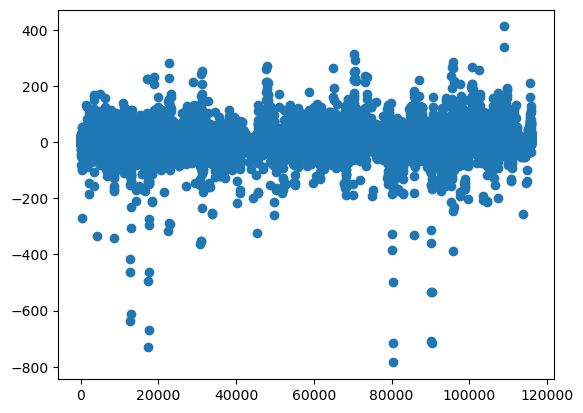

In [59]:
nt_idxs = v_nt.values() # this should be the neurotransmitter indices for each synapse (out of 0-GABA,...,5-OCT)

plt.scatter(np.arange(len(nt_idxs)),v.values()*values[nt_idxs.int()-1]) #for ech neuron, index scaling factor based on neurotransmitter


In [60]:
def dataframe_to_matrix(df, column_names_col, values_col):
    """
    Converts a DataFrame to a matrix using one column for column names and another for values.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_names_col (str): The name of the column to use for column names.
        values_col (str): The name of the column to use for values.

    Returns:
        pd.DataFrame: The resulting matrix DataFrame.
    """

    matrix_df = df.pivot_table(
        index=df.index,
        columns=column_names_col,
        values=values_col,
        aggfunc='first', # Use 'first' to handle duplicate column names
    ).fillna(0) # Fill NaN with 0 if needed

    return matrix_df

matrix_df = dataframe_to_matrix(filtered_conn, 'post_root_id', 'syn_count')
print(matrix_df.loc[720575940627737365,  720575940628914436])
matrix_df

32.0


post_root_id,720575940602553568,720575940602564320,720575940602605536,720575940602815200,720575940602829536,720575940602977248,720575940603045804,720575940603050668,720575940603084972,720575940603111392,...,720575940660175745,720575940660217473,720575940660217729,720575940660217985,720575940660271745,720575940660912001,720575940661114753,720575940661275009,720575940661296001,720575940661337217
pre_root_id,,,,,,,,,,,,,,,,,,,,,
720575940602553568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602564320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602605536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602815200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602829536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720575940660912001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940661114753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940661275009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
rows = matrix_df.index
cols = matrix_df.columns


set1 = set(rows)
print(len(set1))
set2 = set(cols)
set3=set(map(int, used_IDs))

set1=set1.union(set2)
print(len(set1))

not_in_list3 = list(set1.difference(set3))
not_in_list1 = list(set3.difference(set1))

print(f'{len(not_in_list1)} chosen neurons have 0 connections to other chosen neurons and are eliminated')

final_neurons = list(set1)



9490
9628
162 chosen neurons have 0 connections to other chosen neurons and are eliminated


In [62]:
matrix_df = matrix_df.reindex(columns=final_neurons, fill_value=0.0)
matrix_df = matrix_df.reindex(index=final_neurons, fill_value=0.0)

print(matrix_df.loc[720575940627737365,  720575940628914436])
matrix_df

32.0


post_root_id,720575940626251778,720575940628119555,720575940624384007,720575940624154632,720575940627202058,720575940623302669,720575940631003151,720575940625825820,720575940631494687,720575940603674656,...,720575940607180722,720575940623925180,720575940629036997,720575940605280201,720575940624711655,720575940627857384,720575940641062901,720575940650270710,720575940630052857,720575940627988474
pre_root_id,,,,,,,,,,,,,,,,,,,,,
720575940626251778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940628119555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940624384007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940624154632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940627202058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720575940627857384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940641062901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940650270710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

matrix_arr=np.array(matrix_df)


# save as sparse matrix with names??? -> take original dataframe


In [64]:
# try to connect ORN from DoOR dataset to ORN from codex (cell types)
# generalizations due to missing annotations in codex:
# Gr21a.Gr63a -> Gr21a
# Ir64a.DC4 -> Ir64a & DC4 
# Ir64a.DP1m -> Ir64a & DP1m
# Or65a -> Or65
# Or22a -> Or22

# changes based on table 1 in Münch & Galizia, 2016 (and missing search results in codex):
#currently: only switched if other receptor from table is not yet in list, alternative: send to all receptors from table
# ab2B -> Or85a 
# ab4B -> Or56a
# ab5B -> drop (all receptors already otherwise mentioned?)
# ac3A -> Ir75 (a,b,c)
# ac3B -> drop
# pb2A -> drop




ORN_door_dict={0:'Or67d',1:'Or83c',2:'Or23a',3:'Or19a',4:'Or2a',5:'Or43a',6:'Or47b',7:'Or65',8:'Or88a',9:'Or42b',10:'Or92a',11:'Gr21a',12:'Or10a',13:'Or59b', 14:'Or85a',15:'Or33b',16:'Or22',17:'Or85b',18:'Or7a',19:'Or56a',20:'Or33a',21:'',22:'Or82a',24:'Or47a',25:'Or13a',26:'Or49b',27:'Or98a',28:'Or67c',29:'Or43b',30:'Or9a',31:'Or67b',32:'Or69a',33:'Or67a',34:'',35:'Or49a',36:'Or85f',37:'Ir31a',38:'Ir75d',39:'Ir92a',40:'Ir75a',41:'Ir41a',42:'Ir75',44:'Or35a',45:'Ir84a',46:'Ir76a',47:'',48:'',49:'Ir64a.DC4',50:'Ir64a.DP1m',51:'Or42a',52:'Or71a',54:'Or33c',55:'Or85e',56:'Or46a',57:'Or59c',58:'Or85d'}
ORN_door=[]
ORN_door_2_codex={}
ORN_codex_2_door={}
for key, ORN in ORN_door_dict.items():
    if ORN=='Ir75':
        subclasses=['a','b','c']
        for i, sc in enumerate(subclasses):
            if i==0:
                filtered_df=community_labels[community_labels['processed_labels'].str.contains(ORN+sc, na=False)]
            else:
                filtered_df = pd.concat([filtered_df,community_labels[community_labels['processed_labels'].str.contains(ORN+sc, na=False)]])
    elif ORN=='Ir64a.DC4':
        filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DC4', na=False)]
    elif ORN=='Ir64a.DP1m':
        filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DP1m', na=False)]
    else:
        filtered_df = community_labels[community_labels['processed_labels'].str.contains(ORN, na=False)]
    IDs = list(filtered_df['root_id'].astype('str'))
    ORN_door_2_codex[ORN] = IDs
    if ORN!='':
        for ID in IDs:
            ORN_codex_2_door[ID] = ORN
ORN_door_2_codex.pop('', None)




/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h0000gn/T/ipykernel_94259/2132224104.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DC4', na=False)]
/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h0000gn/T/ipykernel_94259/2132224104.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DP1m', na=False)]


['720575940596125868',
 '720575940597856265',
 '720575940597944841',
 '720575940598267657',
 '720575940599333574',
 '720575940599457990',
 '720575940599459782',
 '720575940599704006',
 '720575940599729862',
 '720575940599733446',
 '720575940599736492',
 '720575940599744172',
 '720575940599755718',
 '720575940599763910',
 '720575940600010668',
 '720575940600071689',
 '720575940600084489',
 '720575940600101641',
 '720575940600124169',
 '720575940600143369',
 '720575940600150793',
 '720575940600322965',
 '720575940600433181',
 '720575940600547529',
 '720575940600588204',
 '720575940600623020',
 '720575940600646173',
 '720575940600722348',
 '720575940600782252',
 '720575940600850441',
 '720575940600866569',
 '720575940600934665',
 '720575940601049097',
 '720575940601067436',
 '720575940601103625',
 '720575940601206499',
 '720575940601263473',
 '720575940601325484',
 '720575940601412361',
 '720575940601423625',
 '720575940601598892',
 '720575940601603185',
 '720575940601653513',
 '720575940

In [65]:
ORN_door_2_codex
n=0
for key, item in ORN_door_2_codex.items():
    if len(item)<3:
        print(f'{key}, {len(item)}')
    n+=len(item)
# Or35a, 1 is okay - no other Or35 in codex anyway

Or35a, 1


In [66]:

with open('ORN_door2codex.json', "w") as f:
    json.dump(ORN_door_2_codex, f)

with open('ORN_codex2door.json', "w") as f:
    json.dump(ORN_codex_2_door, f)


In [67]:
input_neurons = []
for key, value in ORN_door_2_codex.items():
    if len(value)>1:
        input_neurons.extend(value)
    else:
        input_neurons.append(value[0])


In [68]:
final_neurons

[720575940626251778,
 720575940628119555,
 720575940624384007,
 720575940624154632,
 720575940627202058,
 720575940623302669,
 720575940631003151,
 720575940625825820,
 720575940631494687,
 720575940603674656,
 720575940623237161,
 720575940624351273,
 720575940628217899,
 720575940631429165,
 720575940633886765,
 720575940614586418,
 720575940616093746,
 720575940646142004,
 720575940637524021,
 720575940627890231,
 720575940633002040,
 720575940630282297,
 720575940627103802,
 720575940614783042,
 720575940615503938,
 720575940638212166,
 720575940638867526,
 720575940629823563,
 720575940620451916,
 720575940622090316,
 720575940629495883,
 720575940618158160,
 720575940617109597,
 720575940620189790,
 720575940634771552,
 720575940622844003,
 720575940635033701,
 720575940628414567,
 720575940634706035,
 720575940608295032,
 720575940621009023,
 720575940659150977,
 720575940606853250,
 720575940659314817,
 720575940648206468,
 720575940627103877,
 720575940621926536,
 720575940625

In [69]:
final_neurons=list(set(final_neurons))
input_neurons=list(set(input_neurons))
hidden_neurons =list(set(final_neurons)-set(input_neurons))


with open("final_neurons_olf.txt", "w") as file:
    for item in final_neurons:
        file.write(str(item) + "\n")

